In [1]:
# imports
import os

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load model
from repro import Net
model_dir = 'out/base'
model = Net()
model.load_state_dict(torch.load(os.path.join(model_dir, 'model.pt')))
model.eval();

In [3]:
# load data
Xtr, Ytr = torch.load('train1989.pt')
Xte, Yte = torch.load('test1989.pt')

In [4]:

def grid_mistakes(X, Y):
    
    plt.figure(figsize=(14, 4))
    ishow, nshow = 0, 14
    for ix in range(X.size(0)):
        x, y = X[[ix]], Y[[ix]]
        yhat = model(x)
        yi = y.argmax()
        yhati = yhat.argmax()
        if yi != yhati:
            plt.subplot(2, 7, ishow+1)
            plt.imshow(x[0,0], cmap='gray')
            plt.title(f'gt={yi}, pred={yhati}')
            plt.axis('off')
            ishow += 1
            if ishow >= nshow:
                break


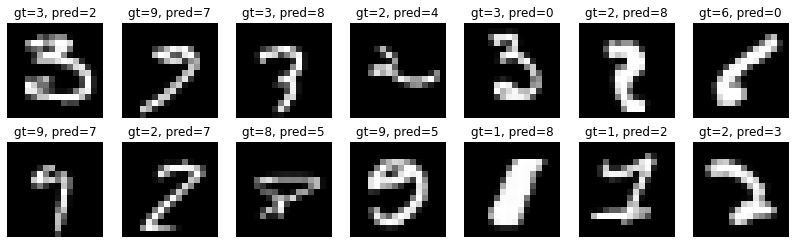

In [5]:
grid_mistakes(Xtr, Ytr) # training set mistakes

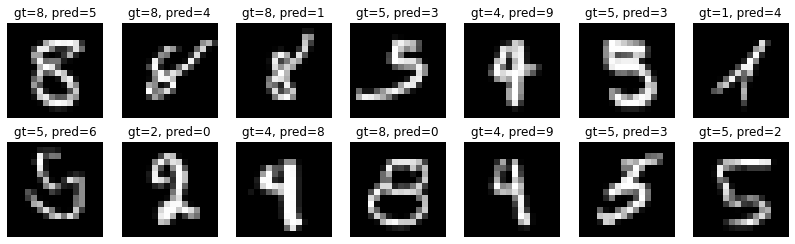

In [6]:
grid_mistakes(Xte, Yte) # test set mistakes